In [1]:
import shutup; shutup.please()
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
from imputation_utils import char_groupings, char_maps
import numpy as np

data = np.load('../data/raw_rank_trunk_chars.npz')
percentile_rank_chars = data['rank_chars']
regular_chars = data['raw_chars']
chars = data['chars']
dates = data['dates']
return_panel = data['returns']
permnos = data['permnos']
rts = data['rfs']
monthly_updates = data['monthly_updates']

from plots_and_tables import section_5

# section 5

## Table 3: Imputation Error for Different Imputation Methods

This table shows imputation RMSE by imputation method averaged over all characteristics and separately for monthly and quarterly updated characteristics. We report the imputation error in-sample evaluated over all observed data, and out-of-sample for masked characteristics from all observed data for the three masking schemes MCAR, Block, and Logit. We report the fallback method in brackets, which is used when a method is not applicable. For example, for missing characteristics of stocks without any prior values, B-XS will be replaced by XS. 

In [4]:
agg_plot = section_5.AggregateImputationErrorsFullDataset()
agg_plot.setup(percentile_rank_chars, chars, monthly_updates)
agg_plot.run()

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
 & aggregate_in_sample & quarterly_in_sample & monthly_in_sample & aggregate_out_of_sample_MAR & quarterly_out_of_sample_MAR & monthly_out_of_sample_MAR & aggregate_out_of_sample_block & quarterly_out_of_sample_block & monthly_out_of_sample_block & aggregate_out_of_sample_logit & quarterly_out_of_sample_logit & monthly_out_of_sample_logit \\
\midrule
global BF-XS, B-XS, XS & 0.09 & 0.08 & 0.11 & 0.12 & 0.12 & 0.12 & 0.17 & 0.16 & 0.19 & 0.19 & 0.15 & 0.25 \\
global B-XS, XS & 0.13 & 0.13 & 0.12 & 0.13 & 0.14 & 0.13 & 0.18 & 0.17 & 0.19 & 0.19 & 0.16 & 0.25 \\
global XS & 0.19 & 0.18 & 0.21 & 0.20 & 0.19 & 0.22 & 0.20 & 0.19 & 0.22 & 0.23 & 0.22 & 0.27 \\
global B, median & 0.14 & 0.14 & 0.15 & 0.15 & 0.15 & 0.15 & 0.21 & 0.21 & 0.23 & 0.22 & 0.18 & 0.29 \\
local B-XS, XS & 0.13 & 0.13 & 0.12 & 0.14 & 0.14 & 0.13 & 0.18 & 0.17 & 0.19 & 0.19 & 0.16 & 0.25 \\
local XS & 0.19 & 0.18 & 0.20 & 0.19 & 0.19 & 0.21 & 0.20 & 0.19 & 0.21 & 0.23 & 0.22 & 0.2

This table shows imputation 𝑅2 by imputation method averaged over all characteristics and separately for monthly and quarterly updated characteristics. We report the imputation error in-sample evaluated over all observed data, and out-of-sample for masked characteristics from all observed data for the three masking schemes MCAR, Block, and Logit. We report the fallback method in brackets, which is
used when a method is not applicable. For example, for missing characteristics of stocks without any prior values, B-XS will be replaced by XS. The 𝑅2 is the explained variation relative to a cross-sectional median imputation.

In [5]:
agg_r2plot = section_5.AggregateImputationR2FullDataset()
agg_r2plot.setup(percentile_rank_chars, chars, monthly_updates)
agg_r2plot.run()
agg_r2plot.data_df

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
 & aggregate_in_sample & quarterly_in_sample & monthly_in_sample & aggregate_out_of_sample_MAR & quarterly_out_of_sample_MAR & monthly_out_of_sample_MAR & aggregate_out_of_sample_block & quarterly_out_of_sample_block & monthly_out_of_sample_block & aggregate_out_of_sample_logit & quarterly_out_of_sample_logit & monthly_out_of_sample_logit \\
\midrule
global BF-XS, B-XS, XS & 0.87 & 0.92 & 0.85 & 0.83 & 0.83 & 0.83 & 0.63 & 0.72 & 0.59 & 0.46 & 0.77 & 0.17 \\
global B-XS, XS & 0.82 & 0.81 & 0.82 & 0.80 & 0.79 & 0.80 & 0.61 & 0.67 & 0.58 & 0.45 & 0.75 & 0.17 \\
global XS & 0.52 & 0.55 & 0.50 & 0.51 & 0.53 & 0.49 & 0.51 & 0.55 & 0.50 & 0.55 & 0.55 & 0.30 \\
global B, median & 0.74 & 0.77 & 0.73 & 0.73 & 0.76 & 0.72 & 0.41 & 0.54 & 0.37 & 0.31 & 0.64 & 0.00 \\
local B-XS, XS & 0.83 & 0.80 & 0.83 & 0.81 & 0.78 & 0.80 & 0.63 & 0.66 & 0.61 & 0.48 & 0.74 & 0.25 \\
local XS & 0.55 & 0.56 & 0.54 & 0.53 & 0.54 & 0.52 & 0.53 & 0.56 & 0.53 & 0.55 & 0.55 & 0.4

,aggregate_in_sample,quarterly_in_sample,monthly_in_sample,aggregate_out_of_sample_MAR,quarterly_out_of_sample_MAR,monthly_out_of_sample_MAR,aggregate_out_of_sample_block,quarterly_out_of_sample_block,monthly_out_of_sample_block,aggregate_out_of_sample_logit,quarterly_out_of_sample_logit,monthly_out_of_sample_logit
"global BF-XS, B-XS, XS",0.86772,0.92262,0.84824,0.82755,0.82736,0.82666,0.62673,0.71763,0.59282,0.46367,0.77300,0.17494
"global B-XS, XS",0.81977,0.80647,0.82184,0.79885,0.79135,0.79994,0.60662,0.67210,0.58041,0.45032,0.74592,0.17494
global XS,0.51501,0.54671,0.49885,0.50750,0.53432,0.49165,0.51180,0.55409,0.49610,0.54602,0.54678,0.29838
"global B, median",0.74405,0.77490,0.73397,0.73322,0.76210,0.72424,0.41096,0.53927,0.37474,0.30755,0.64404,0.00190
"local B-XS, XS",0.82725,0.79619,0.82556,0.80640,0.77756,0.80419,0.63173,0.66255,0.60867,0.48172,0.74490,0.24652
local XS,0.54802,0.56193,0.53928,0.52930,0.53579,0.52077,0.53245,0.55662,0.52502,0.54553,0.54567,0.41909
"local B, median",0.74895,0.76447,0.73550,0.73797,0.74987,0.72547,0.41537,0.53206,0.37433,0.30737,0.64313,0.00187
"prev val, median",0.63673,0.74199,0.59947,0.62368,0.72663,0.58808,0.30395,0.50897,0.24285,0.30317,0.63661,-0.00020
median,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


## Table 4: Imputation Error for Extreme Characteristic Quintiles

This table shows imputation RMSE by imputation method for different types of missingness for the subset of masked values that are in the first or fifth characteristic quintile. We report the imputation error insample evaluated over all observed data, and out-of-sample for masked characteristics from all observed data for the three masking schemes MCAR, Block, and Logit. We report the fallback method in brackets, which is used when a method is not applicable. For example, for missing characteristics of stocks without any prior values B-XS will be replaced by XS.

In [6]:
plot = section_5.ImputationErrorsByCharQuintileFullDS()
plot.setup(percentile_rank_chars, chars, monthly_updates)
print(plot.data_df.to_latex())
plot.run()


\begin{tabular}{lrrrrrrrrrrrr}
\toprule
 & all_in_sample & quarterly_in_sample & monthly_in_sample & all_out_of_sample_MAR & quarterly_out_of_sample_MAR & monthly_out_of_sample_MAR & all_out_of_sample_block & quarterly_out_of_sample_block & monthly_out_of_sample_block & all_out_of_sample_logit & quarterly_out_of_sample_logit & monthly_out_of_sample_logit \\
\midrule
(1, 'global BF-XS, B-XS, XS') & 0.117810 & 0.106120 & 0.136470 & 0.159570 & 0.164510 & 0.151020 & 0.217270 & 0.214910 & 0.221050 & 0.219550 & 0.173480 & 0.302670 \\
(1, 'global B-XS, XS') & 0.160430 & 0.165840 & 0.150140 & 0.169120 & 0.175540 & 0.157920 & 0.225850 & 0.226470 & 0.224850 & 0.225770 & 0.183910 & 0.303470 \\
(1, 'global XS') & 0.247190 & 0.245200 & 0.250750 & 0.254100 & 0.253000 & 0.255900 & 0.259880 & 0.255460 & 0.266890 & 0.276180 & 0.257950 & 0.315610 \\
(1, 'global B, median') & 0.183530 & 0.184170 & 0.182340 & 0.188440 & 0.190450 & 0.185080 & 0.283270 & 0.278670 & 0.290570 & 0.283470 & 0.225680 & 0.388470 

## Figure 10: Illustrative Model-Implied and Imputed Time-Series

This figure shows illustrative realized and model-implied characteristic time-series for Microsoft and Hasbro. We plot the realized characteristic rank over time, and the model-implied values with the B-XS, BF-XS, and median model. The gray-shaded areas indicate missing blocks of one-year which are not part of the estimation, and, hence, serve as out-of-sample evaluation. We consider Total Assets, Tobin’s Q and Variance, which are three representative characteristics of decreasing persistence.

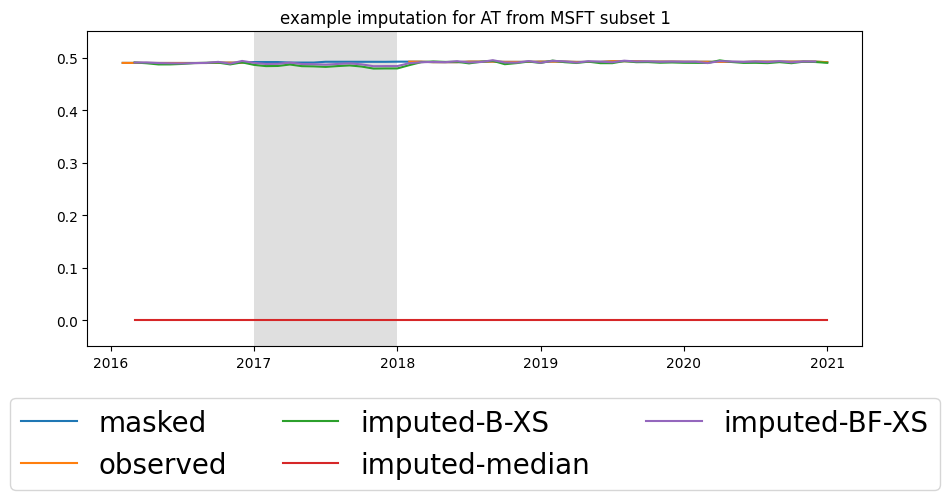

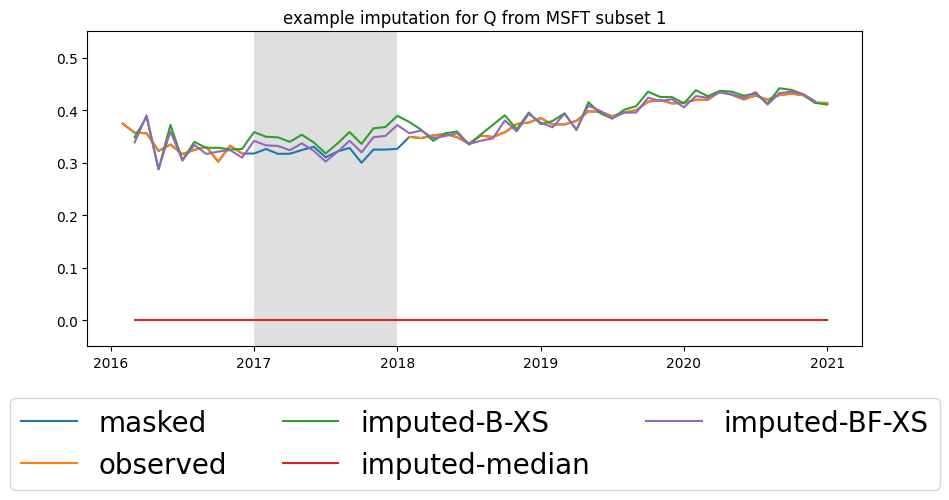

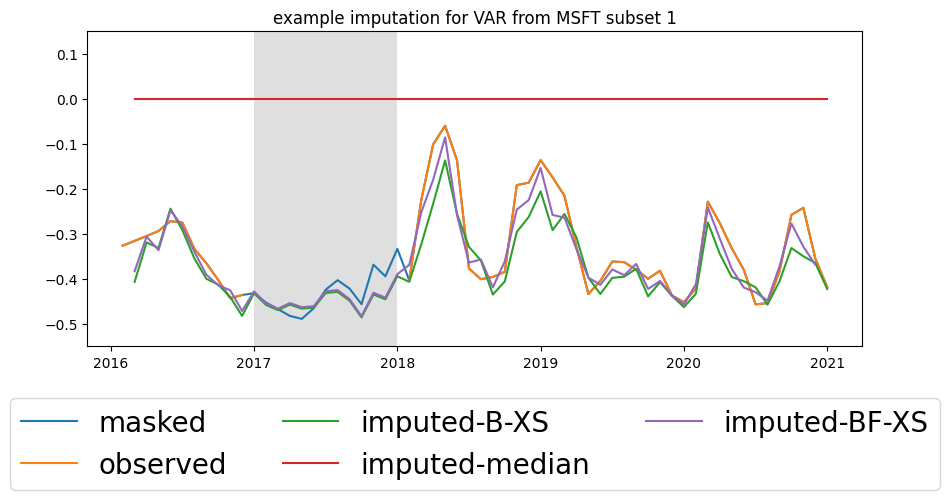

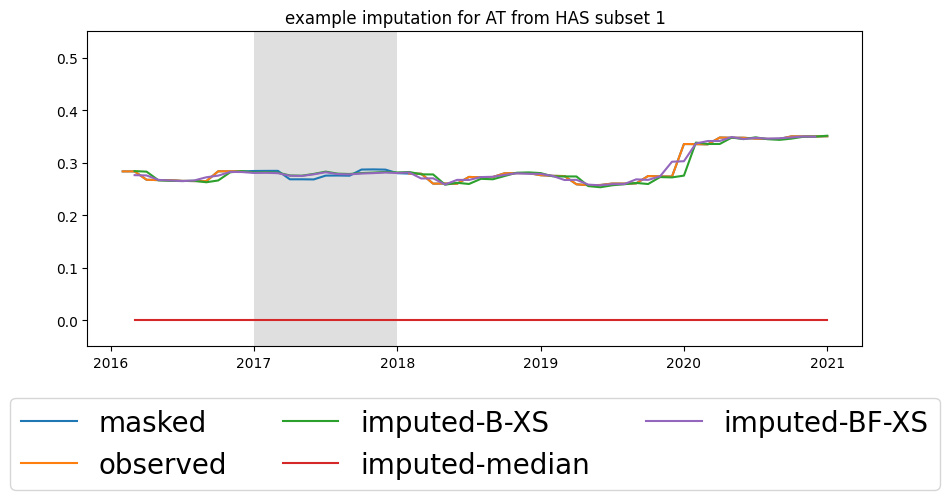

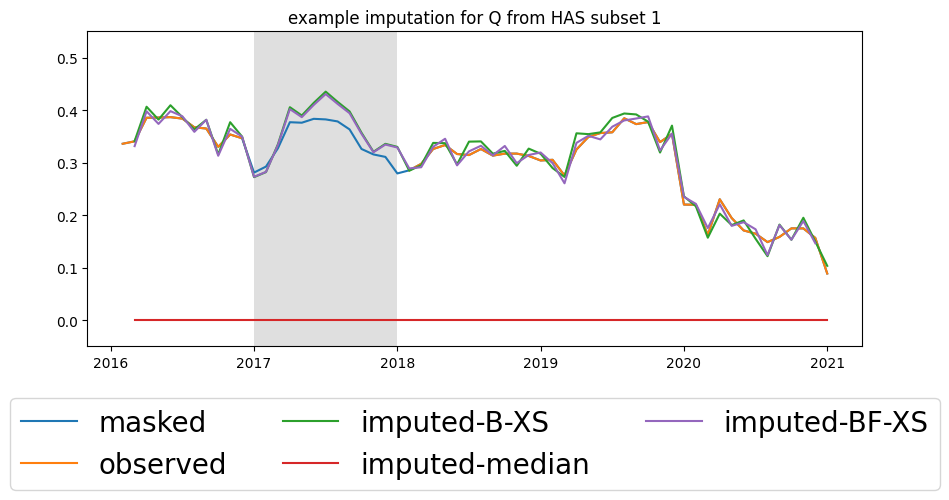

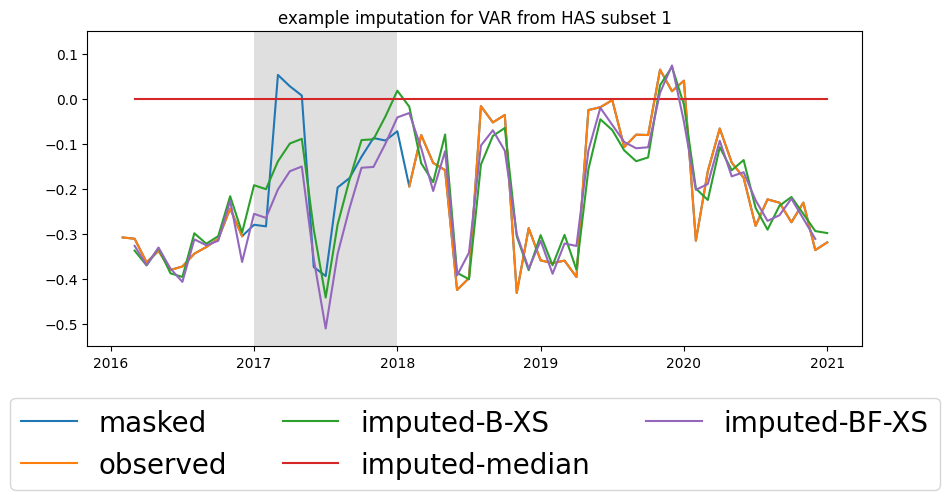

In [3]:
plot = section_5.ExampleImputations()
plot.setup(percentile_rank_chars, return_panel, dates, permnos, chars, char_groupings)
plot.run()


## Table 5: Imputation Error for Types of Missingness

This table shows imputation RMSE by imputation method for different types of missingness. We report the
imputation error in-sample evaluated over all observed data, and out-of-sample for masked characteristics
from all observed data for the three masking schemes MCAR, Block, and Logit.

In [5]:
plot = section_5.ImputationErrorsByMissingTypeStart()
plot.setup(percentile_rank_chars, chars, monthly_updates)
plot.run()

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
 & aggregate_in_sample & quarterly_in_sample & monthly_in_sample & aggregate_out_of_sample_MAR & quarterly_out_of_sample_MAR & monthly_out_of_sample_MAR & aggregate_out_of_sample_block & quarterly_out_of_sample_block & monthly_out_of_sample_block & aggregate_out_of_sample_logit & quarterly_out_of_sample_logit & monthly_out_of_sample_logit \\
\midrule
global BF-XS & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN \\
global F-XS & 0.10 & 0.06 & 0.15 & 0.16 & 0.15 & 0.17 & 0.21 & 0.20 & 0.22 & 0.23 & 0.22 & 0.25 \\
global B-XS & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN \\
global XS & 0.23 & 0.21 & 0.26 & 0.24 & 0.20 & 0.27 & 0.24 & 0.22 & 0.26 & 0.27 & 0.28 & 0.27 \\
global B & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN \\
local B-XS & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN \\
local XS & 0.23 & 0.21 & 0.25 & 0.23 & 0.21 & 0.26 & 0.24 & 0.22 &

In [6]:
plot = section_5.ImputationErrorsByMissingTypeMiddle()
plot.setup(percentile_rank_chars, chars, monthly_updates)
plot.run()

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
 & aggregate_in_sample & quarterly_in_sample & monthly_in_sample & aggregate_out_of_sample_MAR & quarterly_out_of_sample_MAR & monthly_out_of_sample_MAR & aggregate_out_of_sample_block & quarterly_out_of_sample_block & monthly_out_of_sample_block & aggregate_out_of_sample_logit & quarterly_out_of_sample_logit & monthly_out_of_sample_logit \\
\midrule
global BF-XS & 0.09 & 0.08 & 0.10 & 0.12 & 0.12 & 0.11 & 0.14 & 0.14 & 0.16 & 0.11 & 0.11 & 0.13 \\
global F-XS & 0.08 & 0.05 & 0.12 & 0.13 & 0.13 & 0.13 & 0.16 & 0.15 & 0.17 & 0.14 & 0.14 & 0.16 \\
global B-XS & 0.12 & 0.13 & 0.12 & 0.13 & 0.13 & 0.13 & 0.16 & 0.16 & 0.17 & 0.13 & 0.13 & 0.14 \\
global XS & 0.19 & 0.18 & 0.21 & 0.20 & 0.19 & 0.21 & 0.19 & 0.19 & 0.21 & 0.21 & 0.21 & 0.22 \\
global B & 0.14 & 0.13 & 0.14 & 0.14 & 0.14 & 0.14 & 0.18 & 0.17 & 0.20 & 0.15 & 0.14 & 0.17 \\
local B-XS & 0.13 & 0.13 & 0.12 & 0.13 & 0.14 & 0.12 & 0.16 & 0.16 & 0.17 & 0.13 & 0.13 & 0.14 \\
local XS & 0.19 & 

In [7]:
plot = section_5.ImputationErrorsByMissingTypeEnd()
plot.setup(percentile_rank_chars, chars, monthly_updates)
plot.run()

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
 & aggregate_in_sample & quarterly_in_sample & monthly_in_sample & aggregate_out_of_sample_MAR & quarterly_out_of_sample_MAR & monthly_out_of_sample_MAR & aggregate_out_of_sample_block & quarterly_out_of_sample_block & monthly_out_of_sample_block & aggregate_out_of_sample_logit & quarterly_out_of_sample_logit & monthly_out_of_sample_logit \\
\midrule
global BF-XS & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN \\
global F-XS & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN \\
global B-XS & 0.18 & 0.18 & 0.17 & 0.15 & 0.15 & 0.16 & 0.18 & 0.17 & 0.19 & 0.11 & 0.11 & 0.07 \\
global XS & 0.27 & 0.28 & 0.26 & 0.23 & 0.22 & 0.25 & 0.21 & 0.20 & 0.22 & 0.23 & 0.23 & 0.28 \\
global B & 0.19 & 0.20 & 0.18 & 0.16 & 0.15 & 0.18 & 0.20 & 0.19 & 0.22 & 0.11 & 0.11 & 0.07 \\
local B-XS & 0.17 & 0.18 & 0.17 & 0.15 & 0.14 & 0.16 & 0.17 & 0.17 & 0.18 & 0.10 & 0.11 & 0.07 \\
local XS & 0.26 & 0.28 & 0.25 & 0.23 & 0.2

## Figure 11: Imputation Error for Individual Characteristics

This figure shows the imputation RMSE by imputation method across individual characteristics. The characteristics are sorted in ascending order based on the time-series standard deviation of characteristics. We report the imputation error out-of-sample for masked characteristics from all observed data for the blockmasking scheme. We use the fallback method as indicated in Table 3, when a method is not applicable.

In [11]:
import importlib
importlib.reload(section_5)

<module 'plots_and_tables.section_5' from '/Users/sven/repos/stanford/research/missing_data_pub/src/plots_and_tables/section_5.py'>

<Figure size 640x480 with 0 Axes>

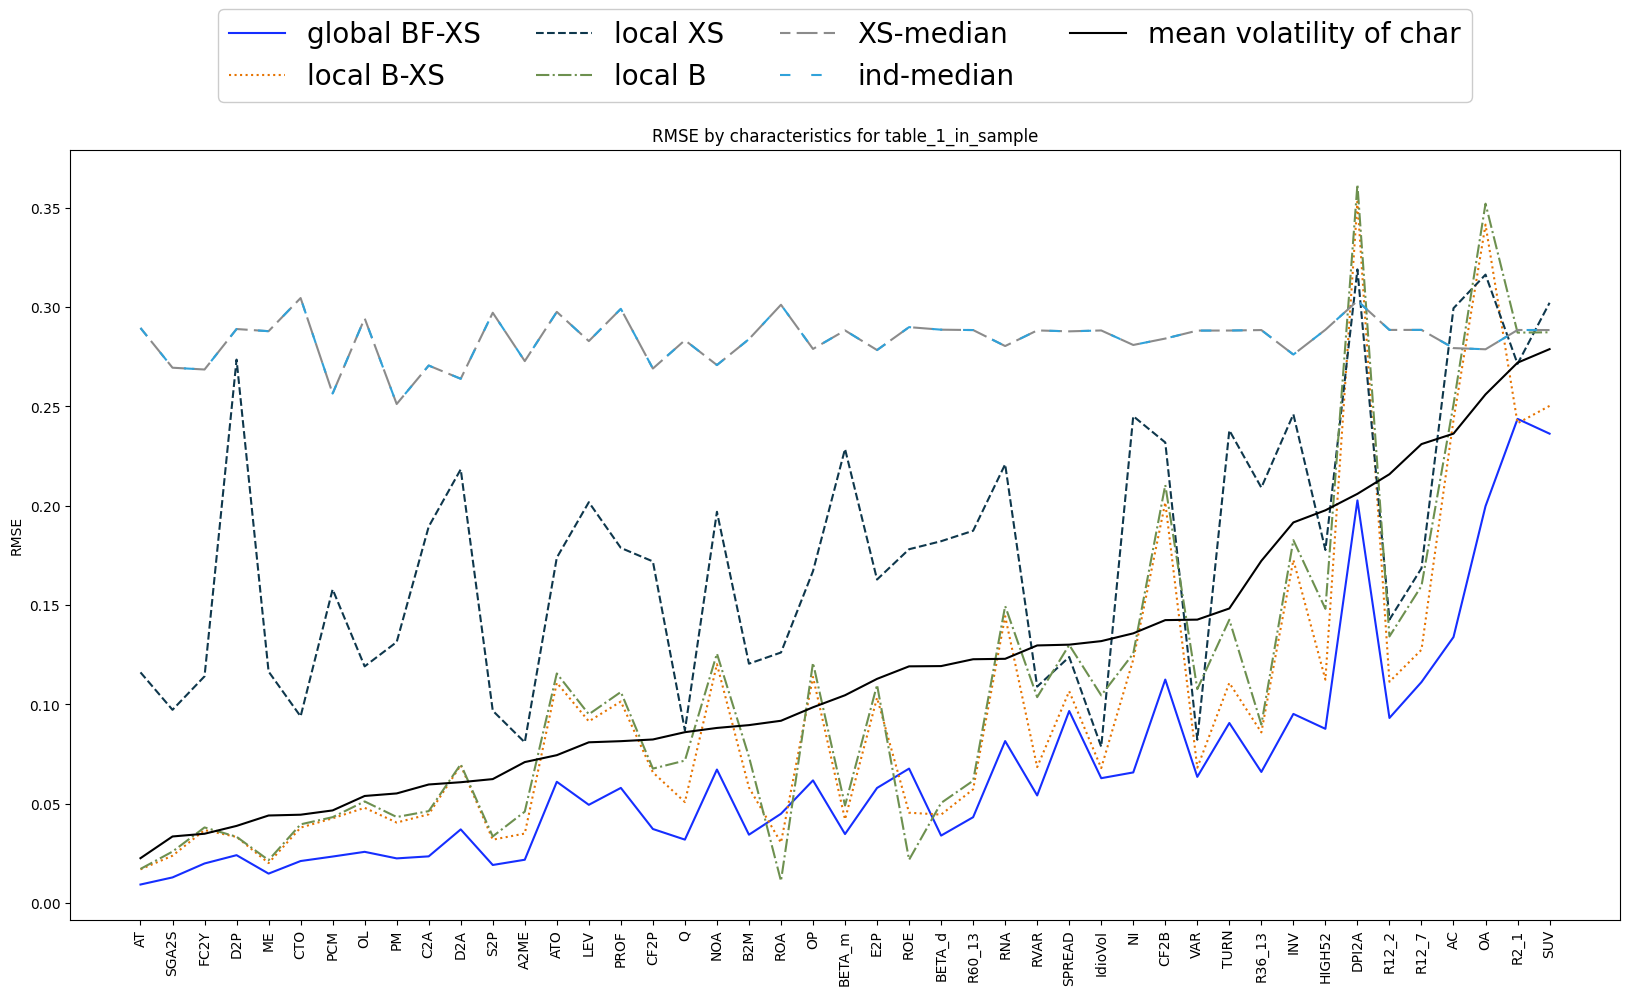

<Figure size 640x480 with 0 Axes>

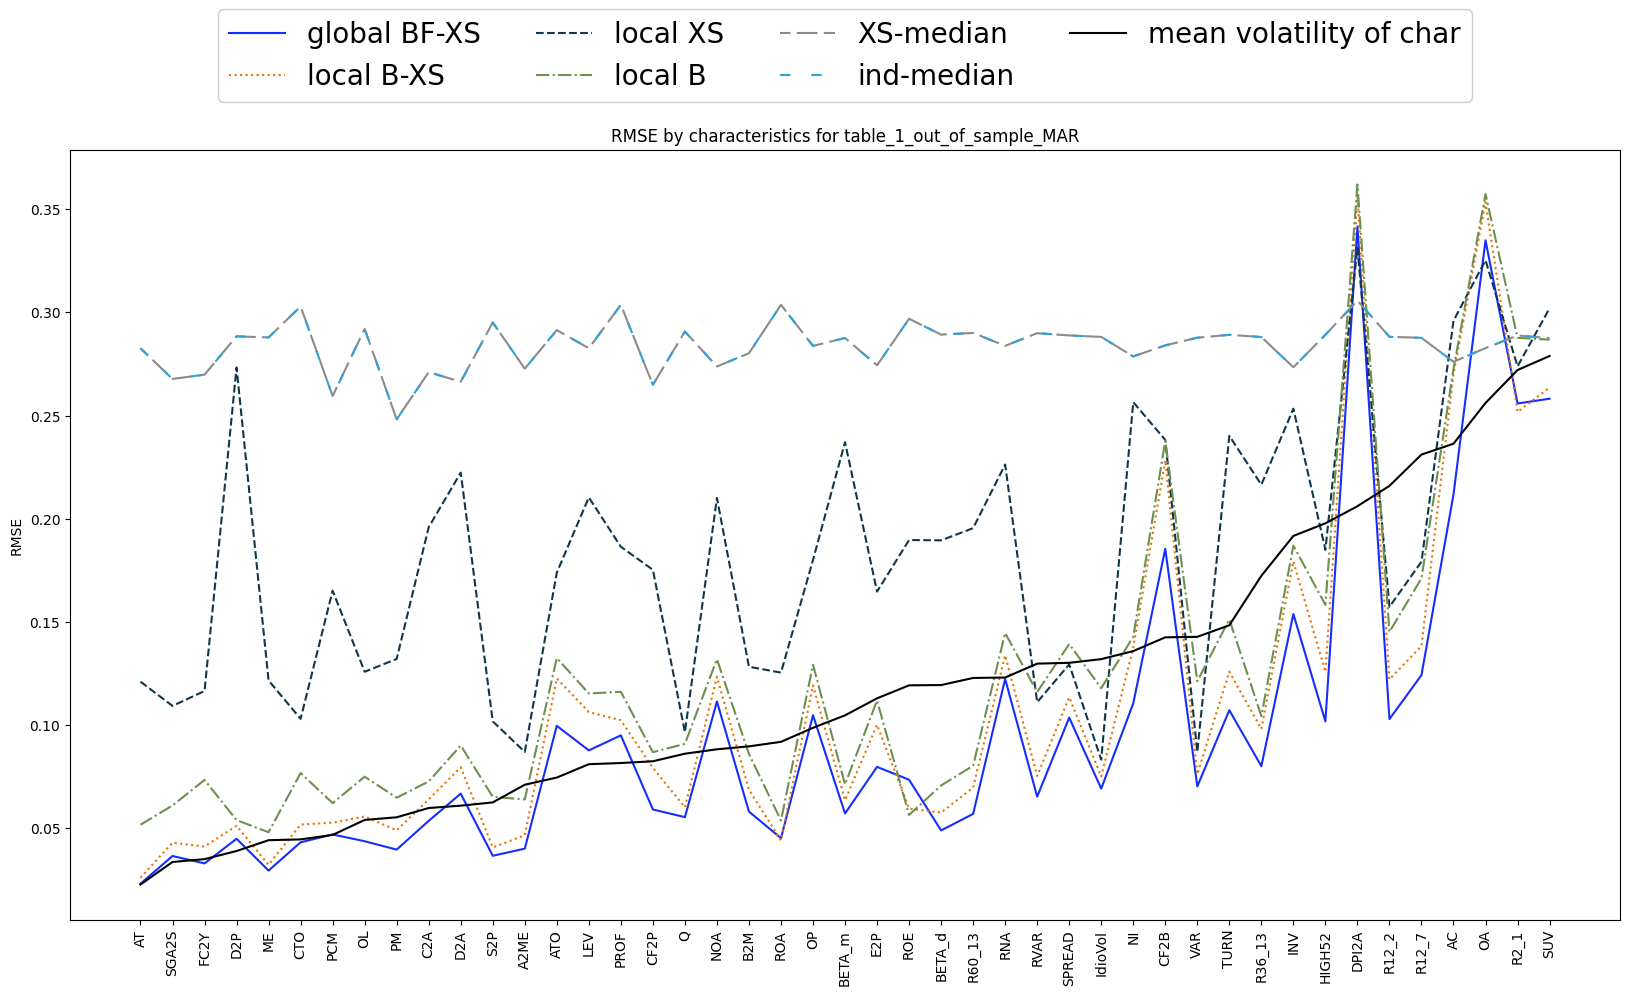

<Figure size 640x480 with 0 Axes>

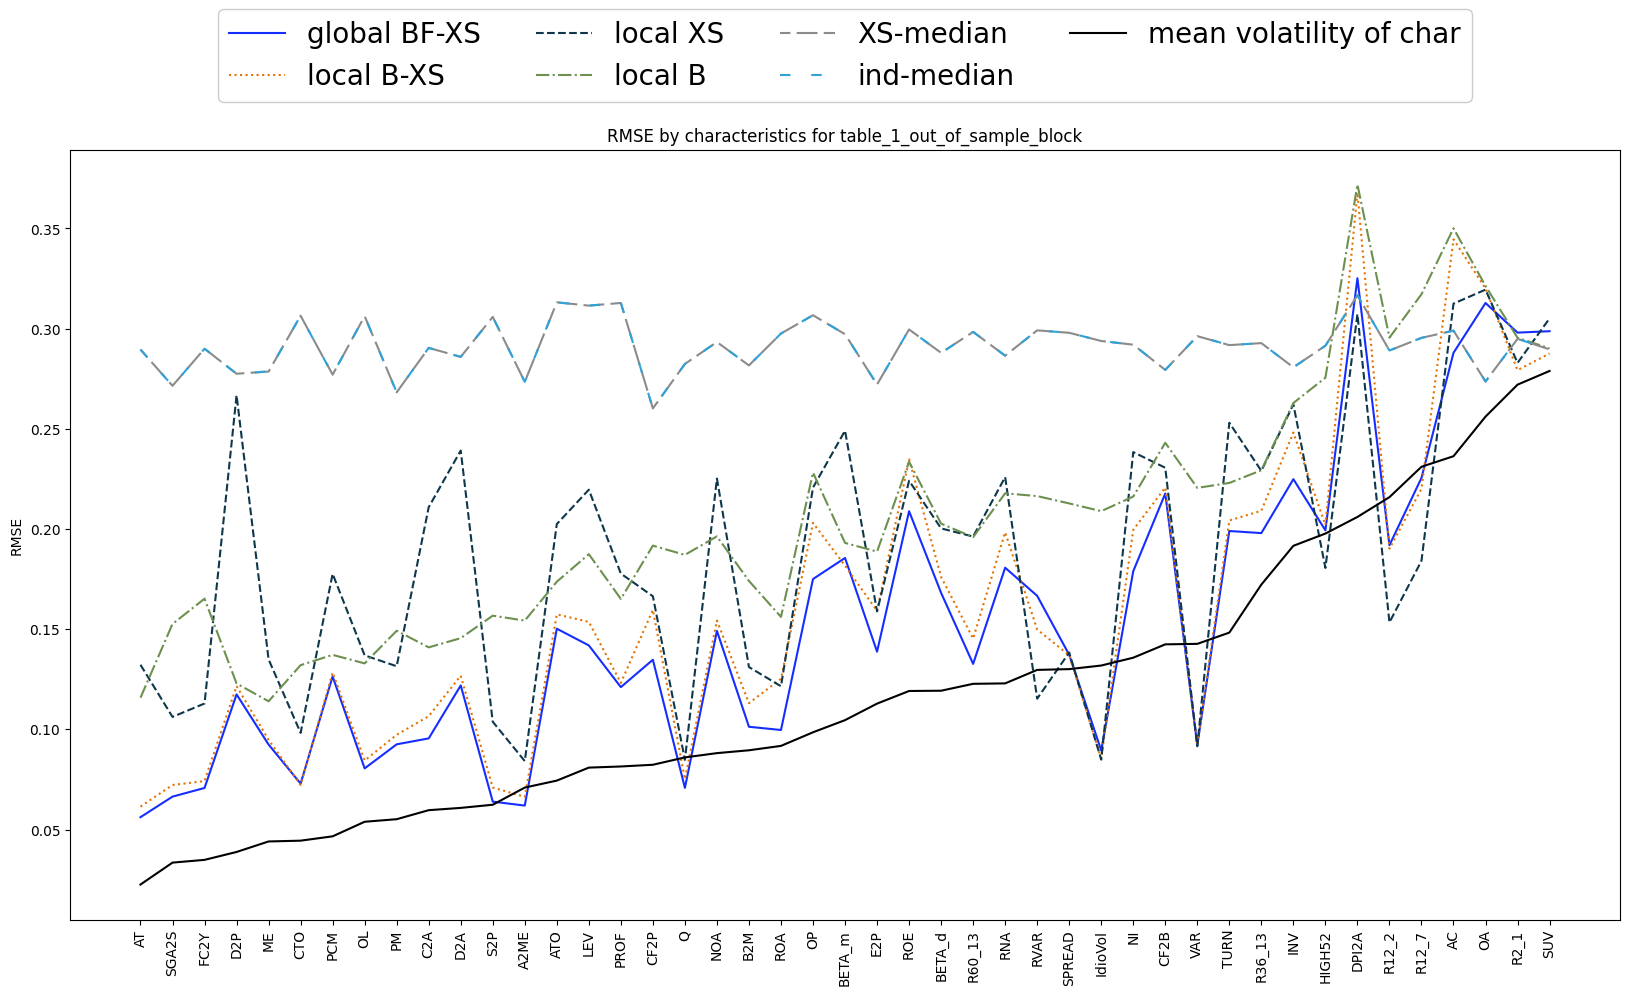

<Figure size 640x480 with 0 Axes>

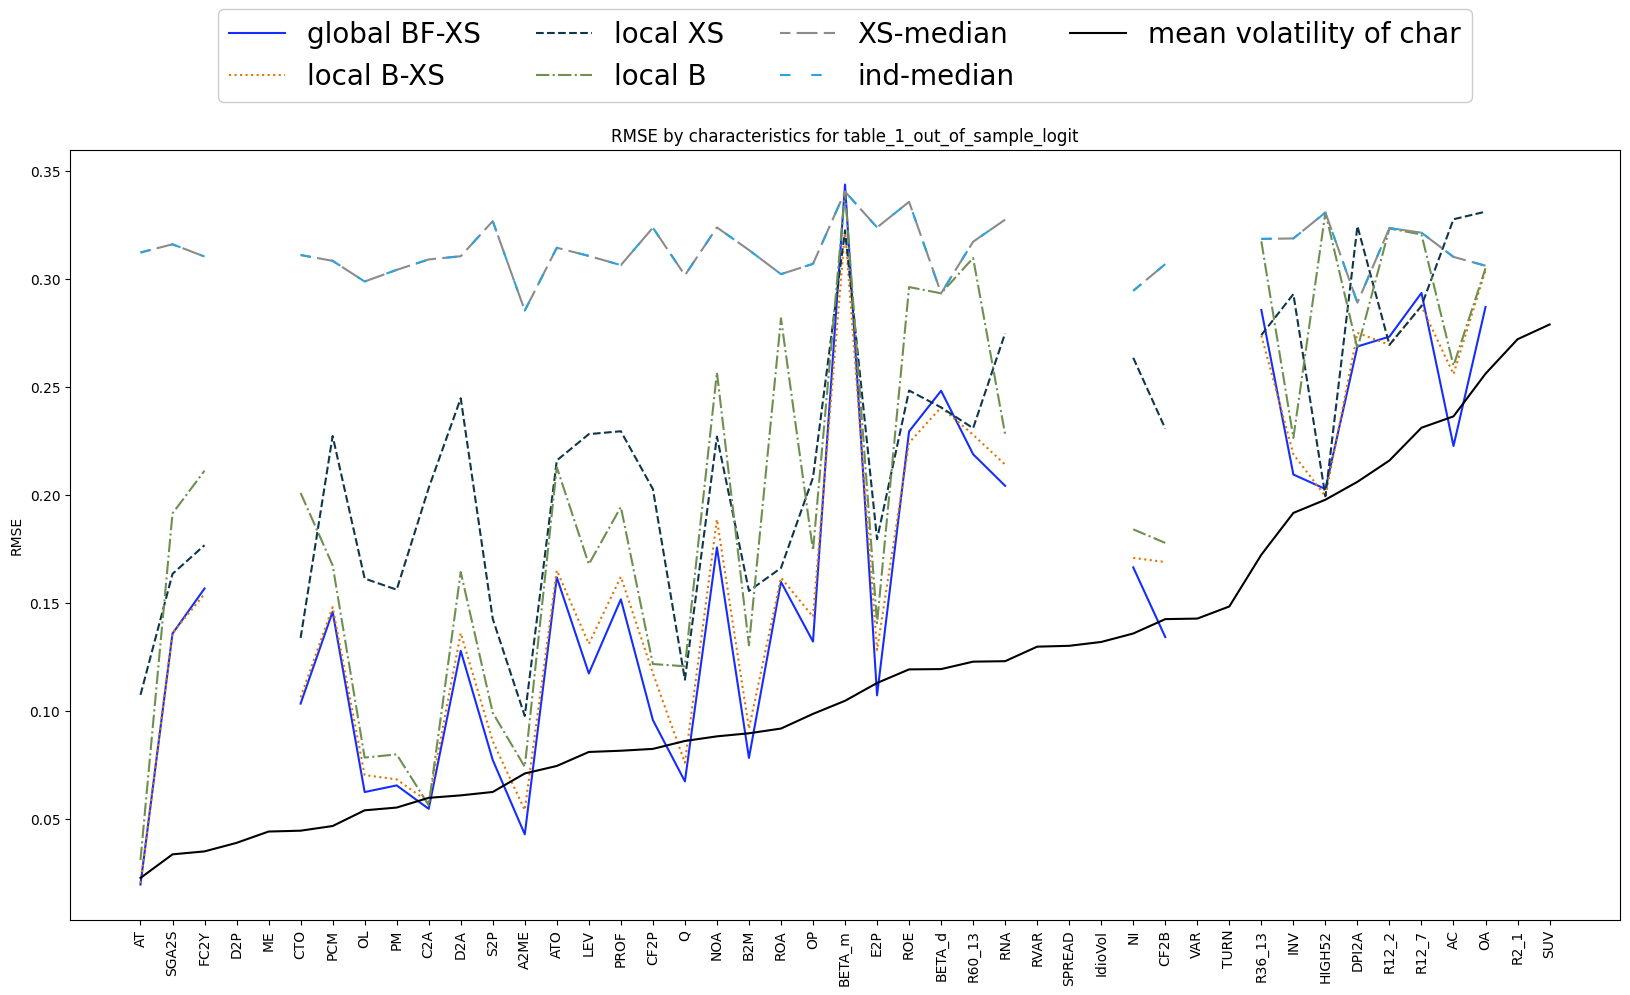

In [12]:
plot = section_5.ImputationErrorPlots()
plot.setup(percentile_rank_chars, chars, monthly_updates, dates, plot_over_time=False, table_1=True)
plot.run()

## Figure 12: Information Used for Imputation
This figure shows the absolute values of the regression coefficients on the cross-sectional factor model and the time-series information for the global B-XS model. The characteristics are sorted in ascending order based on their autocorrelations.

saving to save_loc


<Figure size 640x480 with 0 Axes>

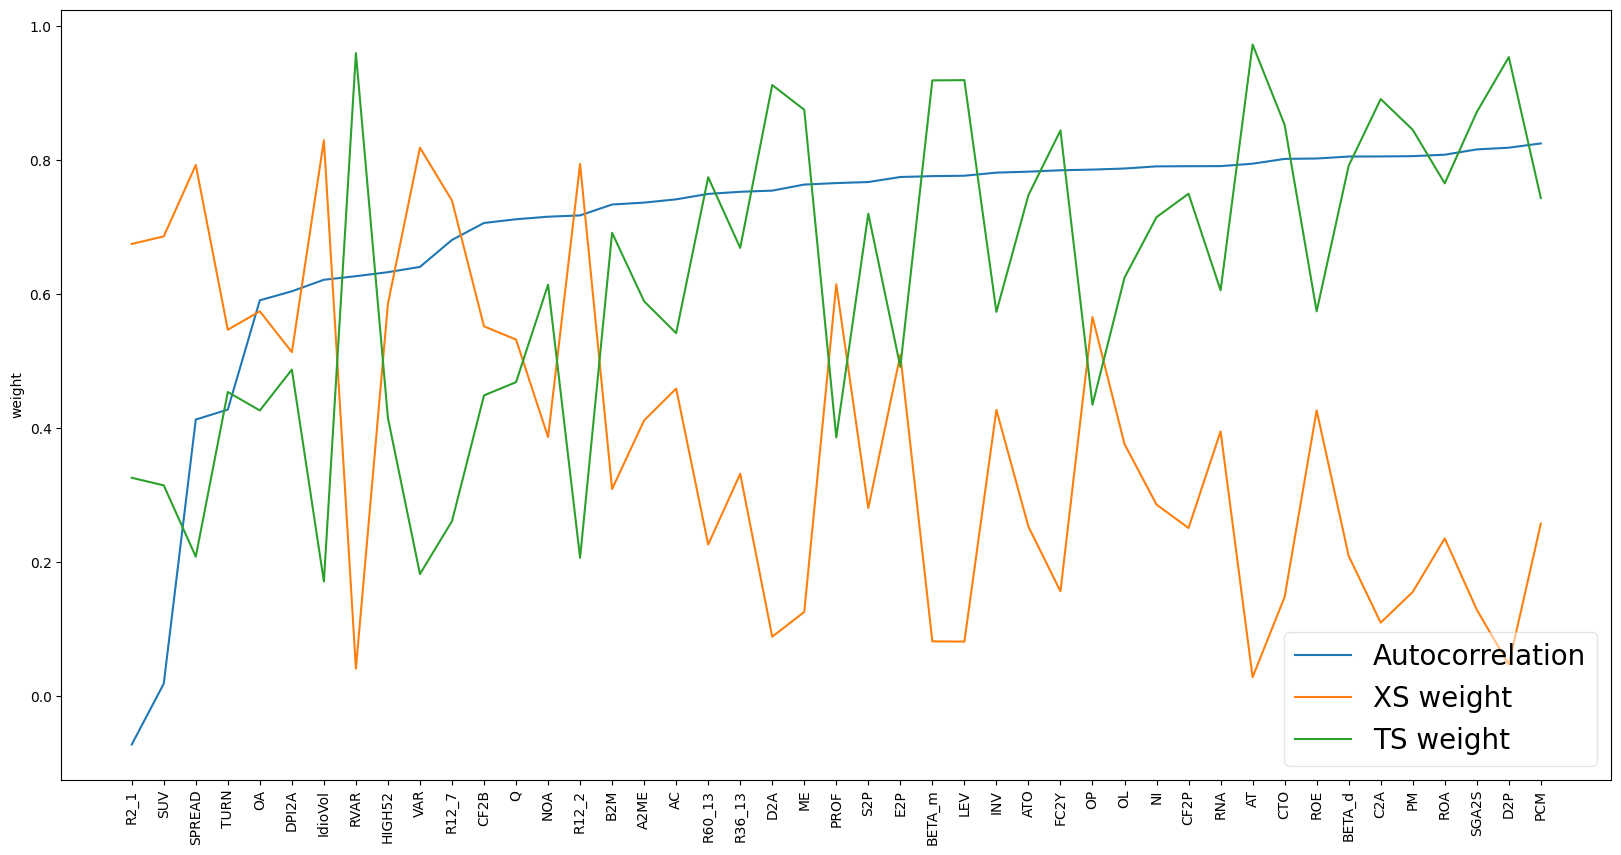

In [9]:
plot = section_5.InfoUsedForImputationBW()
plot.setup(percentile_rank_chars, return_panel, chars, monthly_updates, norm_regressors=True)
plot.run()

## Table 6: Imputation Error for Alternative Methods

This table compares the out-of-sample imputation RMSE for alternative imputation methods averaged over all characteristics and separately for monthly and quarterly updated characteristics. We report the errors on the subset of data that are not missing at the beginning, that is, this data has some prior values of the characteristics observed. We compare our benchmark model, local B-XS, with the Expectation Maximization (EM) algorithm suggested by Chen and McCoy (2022) and a cross-sectional regression on the subset of fully observed characteristics (XS reg. fully obs.) suggested by Freyberger et al. (2022).

In [13]:
import importlib
importlib.reload(section_5)

result = section_5.ComparisonWithAlternativeMethods()
result.setup(percentile_rank_chars, return_panel, char_groupings, chars,
        regular_chars, permnos, dates, rts)
display(result.data_df)
result.run()

(60, 22351, 45, 6)
(60, 22351, 45, 6)
(60, 22351, 45, 6)
(60, 22351, 45, 6)
\begin{tabular}{lrrrrrrrrrrrr}
\toprule
 & aggregate-IN SAMPLE & quarterly-IN SAMPLE & monthly-IN SAMPLE & aggregate-MAR & quarterly-MAR & monthly-MAR & aggregate-BLOCK & quarterly-BLOCK & monthly-BLOCK & aggregate-logit & quarterly-logit & monthly-logit \\
\midrule
local B-XS & 0.091 & 0.076 & 0.114 & 0.133 & 0.137 & 0.125 & 0.167 & 0.164 & 0.173 & 0.131 & 0.128 & 0.140 \\
local XS & 0.190 & 0.181 & 0.206 & 0.194 & 0.186 & 0.209 & 0.192 & 0.185 & 0.206 & 0.211 & 0.212 & 0.207 \\
XS reg. fully obs. & 0.238 & 0.249 & 0.215 & 0.250 & 0.252 & 0.246 & 0.254 & 0.257 & 0.246 & 0.279 & 0.281 & 0.272 \\
EM & 0.000 & 0.000 & 0.000 & 0.170 & 0.159 & 0.187 & 0.170 & 0.162 & 0.183 & 0.184 & 0.184 & 0.185 \\
\bottomrule
\end{tabular}

